# TREINANDO MODELO DE DEEP LEARNING COM ARCGIS API

[ARGIS API](https://developers.arcgis.com/python/api-reference/)

In [1]:
import arcpy
from arcgis.learn import *
from arcgis import GIS

import os
from pathlib import Path
import zipfile

## 1.0 Download Data

<Item title:"detecting_palm_trees_using_deep_learning" type:Image Collection owner:api_data_owner>
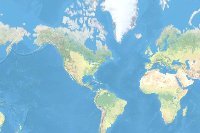

In [2]:
gis = GIS("home")
db = gis.content.get("e7878a3fab0a400f9665d800972395f1")
db

In [4]:
database = db.download(file_name = db.name)

In [6]:
with zipfile.ZipFile(database, "r") as zip_ref:
    zip_ref.extractall(Path(database).parent)

In [7]:
zip_ref

<zipfile.ZipFile [closed]>

## 2.0 Prepare Data

In [79]:
data = Path(os.path.join(os.path.splitext(database)[0]))
data

WindowsPath('C:/Users/jv_at/AppData/Local/Temp/detecting_palm_trees_using_deep_learning')

In [80]:
class_map = {"1":"palmeira"}

data = prepare_data(data, class_mapping = class_map,
                   batch_size = 4, val_split_pct = 0.3)

In [81]:
data

ImageDataBunch;

Train: LabelList (38 items)
x: ObjectDetectionItemList
ArcGISMSImage (3, 224, 224),ArcGISMSImage (3, 224, 224),ArcGISMSImage (3, 224, 224),ArcGISMSImage (3, 224, 224),ArcGISMSImage (3, 224, 224)
y: ObjectDetectionCategoryList
ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224)
Path: C:\Users\jv_at\AppData\Local\Temp\detecting_palm_trees_using_deep_learning\images;

Valid: LabelList (16 items)
x: ObjectDetectionItemList
ArcGISMSImage (3, 224, 224),ArcGISMSImage (3, 224, 224),ArcGISMSImage (3, 224, 224),ArcGISMSImage (3, 224, 224),ArcGISMSImage (3, 224, 224)
y: ObjectDetectionCategoryList
ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224)
Path: C:\Users\jv_at\AppData\Local\Temp\detecting_palm_trees_using_deep_learning\images;

Test: None

In [82]:
data.classes

['background', 'palmeira']

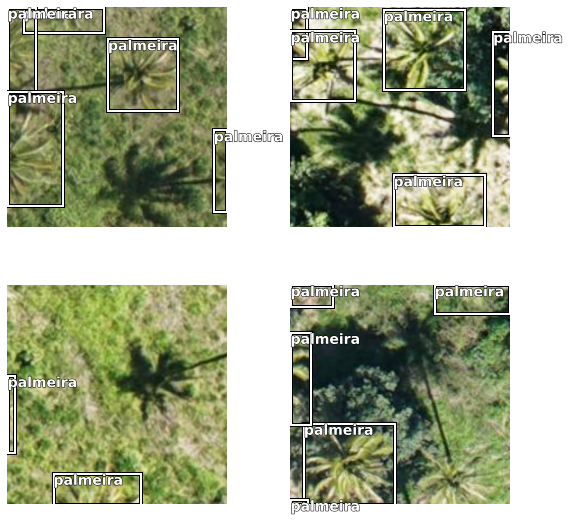

In [83]:
data.show_batch()

## 3.0 Traning Model


[Faster R-CNN](https://developers.arcgis.com/python/api-reference/)
<img src="https://developers.arcgis.com/python/guide/images/rcnn.jpg" width="800" height="800">

[Regional Proposal Network](https://medium.com/egen/region-proposal-network-rpn-backbone-of-faster-r-cnn-4a744a38d7f9)
<img src="https://developers.arcgis.com/python/guide/images/fasterrcnn.jpg" width="300" height="300">


### 3.1 - Teste

In [84]:
model = FasterRCNN(data, backbone = "resnet50")
model

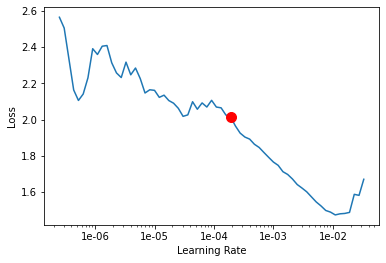

0.00019054607179632462


In [85]:
lr = model.lr_find()
print(lr)

In [86]:
model.fit(30, lr = lr,
          checkpoint = True)

epoch,train_loss,valid_loss,average_precision,time
0,2.178887,1.771142,0.097239,00:10
1,2.185158,1.624499,0.017857,00:09
2,1.996562,1.202321,0.356494,00:09
3,1.709548,0.832809,0.374782,00:08
4,1.452259,0.815595,0.668632,00:08
5,1.294375,0.723600,0.712061,00:09
6,1.161257,0.795294,0.527282,00:08
7,1.091358,0.722305,0.729111,00:09
8,1.005786,0.698823,0.735545,00:09
9,0.968565,0.671899,0.674263,00:09


Encountered error in saving checkpoint.


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000236CD0E6AF0> (for post_execute):


KeyboardInterrupt: 

In [87]:
model.average_precision_score()

{'palmeira': 0.8322505852169577}

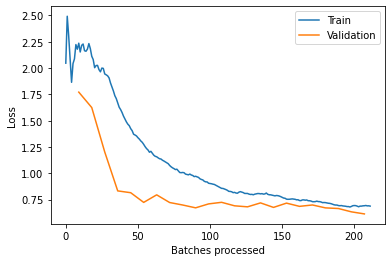

In [88]:
model.plot_losses()

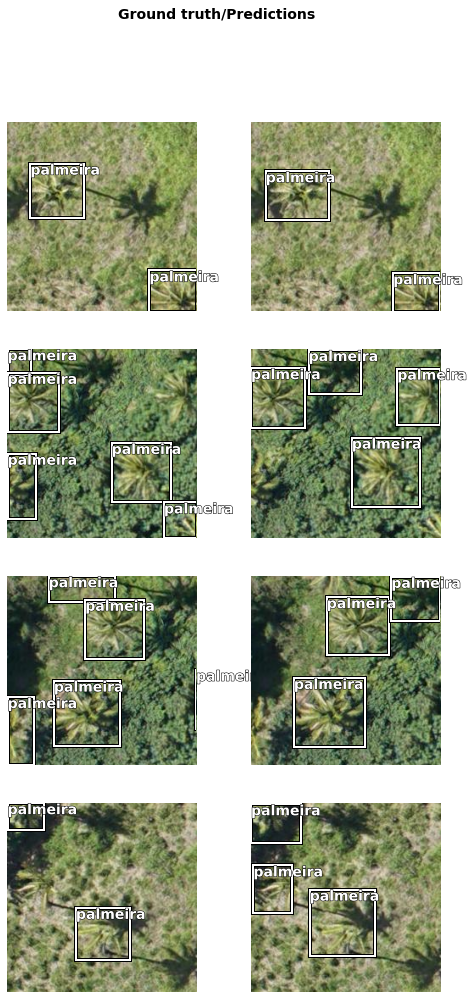

In [89]:
model.show_results()

## 4.0 Save Model

In [90]:
model.save("MODELO_AULA")

Computing model metrics...


WindowsPath('C:/Users/jv_at/AppData/Local/Temp/detecting_palm_trees_using_deep_learning/models/MODELO_AULA')